In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Data Set Creation

In [2]:
#Loading data from Data World: https://data.world/lpetrocelli/retail-banking-demo-data/workspace/intro
loan = pd.read_csv('https://query.data.world/s/m6zu53fnthtoezurvgnzlynwwu5by5')
client = pd.read_csv('https://query.data.world/s/vwgwmzkylqgfsjpphhhcizndlmwdku')
position = pd.read_csv('https://query.data.world/s/nz4rhptfrtsm4fbd4fyvbswwgqwwyl')
trans = pd.read_csv('https://query.data.world/s/qjto5m33rs2l3fi5ezhv6aq4t2bzdd')
order = pd.read_csv('https://query.data.world/s/gyg6ql6qcyy53vlcnt62pfjphzzogk')

/Users/amihailovs/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan.shape

(682, 12)

In [4]:
#Removing columns from the DataFrames, that are ovelapping with the Loan or are not informative enough 

In [5]:
#Client cleaning
#fulldate is a repitition 
client = client.drop(columns = ['address_2'])
#substituting column name to a more meaningfull title
client = client.rename(columns = {'fulldate': 'birthdate','day': 'birth-date', 'month': 'birth-month', 'year': 'birth-year'})

In [6]:
#Transaction cleaning
#Removing duplicated information from the other columns
trans = trans.drop(columns = ['year', 'month', 'day', 'fulldate', 'fulldatewithtime'] )
trans = trans.rename(columns = {'k_symbol': 'To someone'})

In [7]:
#Order cleaning
#Removing the duplicated column
order = order.drop(columns = ['amount'])
order = order.rename(columns = {'k_symbol': 'Request From'})

In [8]:
#Removing columnd type as it is meaningfull in the context
position = position.drop(columns = ['type'])

In [9]:
loan = loan.rename(columns = {'amount': 'credit-amount'})

In [10]:
df = pd.concat([loan, client, position, trans, order], axis=1, join='inner')

In [11]:
#Removing all IDs as it is not needed information
df = df.drop(columns = ['loan_id', 'account_id', 'client_id', 'district_id', 'disp_id', 'client_id', 'account_id','trans_id',
 'account_id', 'trans_id', 'account_id', 'order_id', 'account_id', 'account', 'account_to'])
df = df.drop(columns = df.columns[26])

In [12]:
df

,credit-amount,duration,payments,status,year,month,day,fulldate,location,purpose,sex,birthdate,birth-date,birth-month,birth-year,age,social,first,middle,last,phone,email,address_1,city,state,zipcode,type,operation,amount,balance,To someone,bank,fulltime,bank_to,Request From
0,4980,12,415,A,2014,7,5,2014-07-05,59,car,Female,1990-12-13,13,12,1990,29,926-93-2157,Emma,Avaya,Smith,367-171-6840,emma.smith@gmail.com,387 Wellington Ave.,Albuquerque,NM,47246,Credit,Credit in Cash,700.0,700.0,NaN,NaN,11:02:40,YZ,Household Payment
1,5148,12,429,C,2018,5,28,2018-05-28,1,car,Male,1965-02-04,4,2,1965,54,806-94-5725,Noah,Everest,Thompson,212-423-7734,noah.thompson@gmail.com,75 W. Berkshire St.,New York City,NY,10040,Credit,Credit in Cash,900.0,900.0,NaN,NaN,08:23:33,ST,Loan Payment
2,7656,24,319,A,2014,3,30,2014-03-30,1,car,Female,1960-10-09,9,10,1960,59,614-70-9100,Olivia,Brooklynne,Johnson,212-425-6932,olivia.johnson@outlook.com,36 Second St.,New York City,NY,10162,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,15:19:21,QR,Household Payment
3,8616,24,359,C,2017,9,26,2017-09-26,1,car,Male,1976-12-01,1,12,1976,43,580-20-3414,Liam,Irvin,White,951-567-8925,liam.white@gmail.com,7607 Sunnyslope Street,Indianapolis,IN,49047,Credit,Credit in Cash,600.0,600.0,NaN,NaN,10:42:35,WX,Household Payment
4,10944,36,304,C,2018,5,17,2018-05-17,1,car,Female,1980-07-03,3,7,1980,39,536-14-5809,Sophia,Danae,Williams,428-265-1568,sophia.williams@gmail.com,755 Galvin Street,Indianapolis,IN,40852,Credit,Credit in Cash,400.0,400.0,NaN,NaN,11:39:25,CD,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,504000,60,8400,C,2018,1,20,2018-01-20,18,home,Male,1945-11-28,28,11,1945,74,423-50-5098,Allen,Camari,Cortez,424-700-9334,allen.cortez5@outlook.com,40 College Dr.,Minneapolis,MN,47667,Credit,Collection from Another Bank,3399.0,7411.1,NaN,Wells Fargo & Co.,10:59:12,GH,Insurance Payment
678,538500,60,8975,C,2015,2,17,2015-02-17,64,home,Female,1983-08-16,16,8,1983,36,704-97-5207,Haven,Lexi,Schwartz,508-056-6464,haven.lexi.schwartz@gmail.com,9650 Orchard St.,Worcester,MA,1603,Credit,Collection from Another Bank,5298.0,16336.9,Old Age Pension,Bank of New York Mellon Corp.,10:21:27,IJ,
679,541200,60,9020,D,2017,11,12,2017-11-12,59,home,Male,1982-12-04,4,12,1982,37,558-20-4702,Atticus,Crue,Le,466-804-7095,atticus.le6@gmail.com,638 N. 3rd Ave.,Houston,TX,44825,Credit,Collection from Another Bank,4042.0,4542.0,Old Age Pension,Bank of America,15:14:31,AB,Leasing Payment
680,566640,60,9444,C,2018,1,23,2018-01-23,1,home,Female,2000-03-29,29,3,2000,19,869-33-9702,Rowan,Katie,Steele,240-698-9725,rowan.steele@outlook.com,68 Highland St.,Kansas City,MO,47471,Credit,Credit in Cash,14493.0,34324.3,NaN,NaN,13:44:49,EF,Household Payment


In [13]:
#Creating Feature of using website for mail
df['email'] = df['email'].str.split('@', expand=True)[1]

# Data Quality Check

### Targets:
Analyse the given data set, and identify if and what data quality
problems can be observed in the data set;

Describe the identified data quality issues;

In [14]:
#Change table title for readability (it is easier for Pandas library usage) - ???
#DataCleaning algorithms

In [15]:
#Sometimes there are spaces in the end of title, with this function it is removed, for the sake of Uniformity Data Quality principle
df.columns = df.columns.str.rstrip() 

In [16]:
#Checking the length of titles
def lenght(x):
    print (len(df.columns[x]), df.columns[x], sep ='-', end = '\n')
    if x > 33:
        return 
    else:
        return lenght(x+1)

In [17]:
lenght(0)

13-credit-amount
8-duration
8-payments
6-status
4-year
5-month
3-day
8-fulldate
8-location
7-purpose
3-sex
9-birthdate
10-birth-date
11-birth-month
10-birth-year
3-age
6-social
5-first
6-middle
4-last
5-phone
5-email
9-address_1
4-city
5-state
7-zipcode
4-type
9-operation
6-amount
7-balance
10-To someone
4-bank
8-fulltime
7-bank_to
12-Request From


In [18]:
#The amount of digits must be the same as it is in naming. Otherwise, it complicates the search.  In the example below, ‘Birth Date’ column had one space after the title. 

In [19]:
#Cheking table for duplicated columns

In [20]:
from tqdm import tqdm_notebook

dup_cols = {}

for i, c1 in enumerate(tqdm_notebook(df.columns)):
    for c2 in df.columns[i + 1:]:
        if c2 not in dup_cols and np.all(df[c1] == df[c2]):
            dup_cols[c2] = c1

In [21]:
dup_cols

{}

In [22]:
df

,credit-amount,duration,payments,status,year,month,day,fulldate,location,purpose,sex,birthdate,birth-date,birth-month,birth-year,age,social,first,middle,last,phone,email,address_1,city,state,zipcode,type,operation,amount,balance,To someone,bank,fulltime,bank_to,Request From
0,4980,12,415,A,2014,7,5,2014-07-05,59,car,Female,1990-12-13,13,12,1990,29,926-93-2157,Emma,Avaya,Smith,367-171-6840,gmail.com,387 Wellington Ave.,Albuquerque,NM,47246,Credit,Credit in Cash,700.0,700.0,NaN,NaN,11:02:40,YZ,Household Payment
1,5148,12,429,C,2018,5,28,2018-05-28,1,car,Male,1965-02-04,4,2,1965,54,806-94-5725,Noah,Everest,Thompson,212-423-7734,gmail.com,75 W. Berkshire St.,New York City,NY,10040,Credit,Credit in Cash,900.0,900.0,NaN,NaN,08:23:33,ST,Loan Payment
2,7656,24,319,A,2014,3,30,2014-03-30,1,car,Female,1960-10-09,9,10,1960,59,614-70-9100,Olivia,Brooklynne,Johnson,212-425-6932,outlook.com,36 Second St.,New York City,NY,10162,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,15:19:21,QR,Household Payment
3,8616,24,359,C,2017,9,26,2017-09-26,1,car,Male,1976-12-01,1,12,1976,43,580-20-3414,Liam,Irvin,White,951-567-8925,gmail.com,7607 Sunnyslope Street,Indianapolis,IN,49047,Credit,Credit in Cash,600.0,600.0,NaN,NaN,10:42:35,WX,Household Payment
4,10944,36,304,C,2018,5,17,2018-05-17,1,car,Female,1980-07-03,3,7,1980,39,536-14-5809,Sophia,Danae,Williams,428-265-1568,gmail.com,755 Galvin Street,Indianapolis,IN,40852,Credit,Credit in Cash,400.0,400.0,NaN,NaN,11:39:25,CD,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,504000,60,8400,C,2018,1,20,2018-01-20,18,home,Male,1945-11-28,28,11,1945,74,423-50-5098,Allen,Camari,Cortez,424-700-9334,outlook.com,40 College Dr.,Minneapolis,MN,47667,Credit,Collection from Another Bank,3399.0,7411.1,NaN,Wells Fargo & Co.,10:59:12,GH,Insurance Payment
678,538500,60,8975,C,2015,2,17,2015-02-17,64,home,Female,1983-08-16,16,8,1983,36,704-97-5207,Haven,Lexi,Schwartz,508-056-6464,gmail.com,9650 Orchard St.,Worcester,MA,1603,Credit,Collection from Another Bank,5298.0,16336.9,Old Age Pension,Bank of New York Mellon Corp.,10:21:27,IJ,
679,541200,60,9020,D,2017,11,12,2017-11-12,59,home,Male,1982-12-04,4,12,1982,37,558-20-4702,Atticus,Crue,Le,466-804-7095,gmail.com,638 N. 3rd Ave.,Houston,TX,44825,Credit,Collection from Another Bank,4042.0,4542.0,Old Age Pension,Bank of America,15:14:31,AB,Leasing Payment
680,566640,60,9444,C,2018,1,23,2018-01-23,1,home,Female,2000-03-29,29,3,2000,19,869-33-9702,Rowan,Katie,Steele,240-698-9725,outlook.com,68 Highland St.,Kansas City,MO,47471,Credit,Credit in Cash,14493.0,34324.3,NaN,NaN,13:44:49,EF,Household Payment


In [23]:
df.duplicated().sum()

0

In [24]:
#No duplicates is found

In [25]:
#Checking the percentage of nulls in the column
def intitial_eda_checks(df):
    '''
    Takes df
    Checks nulls
    '''
    if df.isnull().sum().sum() > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False) 
        total = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] 

        missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
        print(f'Total and Percentage of NaN:\n {missing_data}')
    else: 
        print('No NaN found.')

In [26]:
intitial_eda_checks(df)

Total and Percentage of NaN:
             Total   Percent
bank          583  0.854839
To someone    482  0.706745
operation     141  0.206745


In [27]:
#Three columns have a large amount of missing values. 
#Therefore, they should be looked closer and decided whether it is crucial data or can be simply removed

In [28]:
#Evaluate whether the data frame contains duplicate rows.
df.duplicated().sum()

0

# Explonatory Data Analysis

EDA is required for knowledge elicitation for new feature generation and understanding the data for removing irrelevant attributes as well check hypotesis. The process is devided into two parts, first - for EDA itself and vizualizating data, second - for converting the information into readable for model information. Since the model required for the recommendation system, no need for removing for not arguable and some general outliers as they does not affect the performance. 

In [29]:
#Printing out the general information of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 35 columns):
credit-amount    682 non-null int64
duration         682 non-null int64
payments         682 non-null int64
status           682 non-null object
year             682 non-null int64
month            682 non-null int64
day              682 non-null int64
fulldate         682 non-null object
location         682 non-null int64
purpose          682 non-null object
sex              682 non-null object
birthdate        682 non-null object
birth-date       682 non-null int64
birth-month      682 non-null int64
birth-year       682 non-null int64
age              682 non-null int64
social           682 non-null object
first            682 non-null object
middle           682 non-null object
last             682 non-null object
phone            682 non-null object
email            682 non-null object
address_1        682 non-null object
city             682 non-null object
state            6

In [30]:
#Change formats to dates
df['fulldate'] = df['fulldate'].astype('datetime64[ns]')
df['birthdate'] = df['birthdate'].astype('datetime64')
##fulltime???; 

In [31]:
#Brief statistic for numeric attributes
statistic_num = df[['credit-amount', 'duration', 'payments', 'year', 'age']]
statistic_num.describe()

,credit-amount,duration,payments,year,age
count,682.000000,682.000000,682.000000,682.000000,682.000000
mean,151410.175953,36.492669,4190.664223,2016.234604,45.928152
std,113372.406310,17.075219,2215.830344,1.466445,17.997939
min,4980.000000,12.000000,304.000000,2013.000000,16.000000
25%,66732.000000,24.000000,2477.000000,2015.000000,30.000000
50%,116928.000000,36.000000,3934.000000,2017.000000,45.000000
75%,210654.000000,48.000000,5813.500000,2017.000000,60.000000
max,590820.000000,60.000000,9910.000000,2018.000000,82.000000


In [32]:
#Brief statistic for objects' attributes 
statistic_obj = df[['status', 'purpose', 'sex', 'email', 'city']]
statistic_obj.describe(include=['object'])

,status,purpose,sex,email,city
count,682,682,682,682,682
unique,4,4,2,4,75
top,C,home,Male,gmail.com,New York City
freq,403,537,351,434,84


In [33]:
#Brief statistic for objects' attributes 
df.describe(include=['object'])

,status,purpose,sex,social,first,middle,last,phone,email,address_1,city,state,type,operation,To someone,bank,fulltime,bank_to,Request From
count,682,682,682,682,682,682,682,682,682,682,682,682,682,541,200,99,682,682,682
unique,4,4,2,682,669,677,369,682,4,682,75,51,2,4,6,13,675,13,5
top,C,home,Male,465-94-8869,Riley,Olivia,Butler,735-784-3483,gmail.com,191 Wall Lane,New York City,NY,Credit,Credit in Cash,Interest Credited,Bank of New York Mellon Corp.,08:48:50,KL,Household Payment
freq,403,537,351,1,2,2,2,1,434,1,84,114,640,404,141,14,2,62,392


In [34]:
#The attribute 'purpose' is the target value. Expanding its distribution and see on what customers commonly take credits.
df['purpose'].value_counts()

home                  537
debt_consolidation     75
home_improvement       40
car                    30
Name: purpose, dtype: int64

In [35]:
df['purpose'].value_counts(normalize=True)

home                  0.787390
debt_consolidation    0.109971
home_improvement      0.058651
car                   0.043988
Name: purpose, dtype: float64

In [36]:
#Mainly people take credits for home in banks and the rest are for some urgent cases

In [37]:
df.sort_values(by='credit-amount', ascending=False).head()

,credit-amount,duration,payments,status,year,month,day,fulldate,location,purpose,sex,birthdate,birth-date,birth-month,birth-year,age,social,first,middle,last,phone,email,address_1,city,state,zipcode,type,operation,amount,balance,To someone,bank,fulltime,bank_to,Request From
681,590820,60,9847,C,2017,10,19,2017-10-19,1,home,Male,1990-10-08,8,10,1990,29,182-95-8261,Desmond,Devante,Griffith,163-034-9224,hotmail.com,498 Albany Street,Des Moines,IA,48004,Credit,Credit in Cash,8200.0,18218.7,NaN,NaN,15:45:13,WX,
680,566640,60,9444,C,2018,1,23,2018-01-23,1,home,Female,2000-03-29,29,3,2000,19,869-33-9702,Rowan,Katie,Steele,240-698-9725,outlook.com,68 Highland St.,Kansas City,MO,47471,Credit,Credit in Cash,14493.0,34324.3,NaN,NaN,13:44:49,EF,Household Payment
679,541200,60,9020,D,2017,11,12,2017-11-12,59,home,Male,1982-12-04,4,12,1982,37,558-20-4702,Atticus,Crue,Le,466-804-7095,gmail.com,638 N. 3rd Ave.,Houston,TX,44825,Credit,Collection from Another Bank,4042.0,4542.0,Old Age Pension,Bank of America,15:14:31,AB,Leasing Payment
678,538500,60,8975,C,2015,2,17,2015-02-17,64,home,Female,1983-08-16,16,8,1983,36,704-97-5207,Haven,Lexi,Schwartz,508-056-6464,gmail.com,9650 Orchard St.,Worcester,MA,1603,Credit,Collection from Another Bank,5298.0,16336.9,Old Age Pension,Bank of New York Mellon Corp.,10:21:27,IJ,
677,504000,60,8400,C,2018,1,20,2018-01-20,18,home,Male,1945-11-28,28,11,1945,74,423-50-5098,Allen,Camari,Cortez,424-700-9334,outlook.com,40 College Dr.,Minneapolis,MN,47667,Credit,Collection from Another Bank,3399.0,7411.1,NaN,Wells Fargo & Co.,10:59:12,GH,Insurance Payment


In [39]:
#Identifying the average values of numerical attributes for distribution amoung target values.

In [40]:
df[df['purpose'] == 'home'].mean()

credit-amount    182298.435754
duration             40.044693
payments           4755.968343
year               2016.240223
month                 6.614525
day                  15.547486
location             15.621974
birth-date           15.901304
birth-month           6.510242
birth-year         1973.031657
age                  46.063315
zipcode           34231.325885
amount             6970.182682
balance           19597.037616
dtype: float64

In [41]:
df[df['purpose'] == 'debt_consolidation'].mean()

credit-amount    39901.920000
duration            23.680000
payments          2225.533333
year              2016.253333
month                7.213333
day                 14.800000
location            12.306667
birth-date          17.346667
birth-month          6.986667
birth-year        1972.986667
age                 46.080000
zipcode          37819.773333
amount            6412.609333
balance           9296.306667
dtype: float64

In [42]:
df[df['purpose'] == 'home_improvement'].mean()

credit-amount    46853.4000
duration            21.3000
payments          2776.8500
year              2016.2000
month                6.0500
day                 15.9250
location            14.2500
birth-date          18.5250
birth-month          6.3250
birth-year        1975.1250
age                 43.9500
zipcode          32916.5750
amount            4255.6275
balance           6382.7475
dtype: float64

In [43]:
df[df['purpose'] == 'car'].mean()

credit-amount    16690.000000
duration            25.200000
payments           869.633333
year              2016.133333
month                7.000000
day                 14.633333
location            13.166667
birth-date          16.066667
birth-month          6.400000
birth-year        1973.366667
age                 45.766667
zipcode          31771.233333
amount            1606.366667
balance           1713.033333
dtype: float64

In [45]:
#Selecting the destribution of gender for credit for homes

In [46]:
"{:.2f}".format(df[(df['purpose'] == 'home') & (df['sex'] == 'Male')]['credit-amount'].mean())

'186670.23'

In [47]:
"{:.2f}".format(df[(df['purpose'] == 'home') & (df['sex'] == 'Female')]['credit-amount'].mean())

'177605.93'

In [48]:
#Male takes credit for larger amount of money

In [49]:
###

In [50]:
#Reveals statistics of females
df[df['sex'].apply(lambda state: state[0] == 'F')].head()

,credit-amount,duration,payments,status,year,month,day,fulldate,location,purpose,sex,birthdate,birth-date,birth-month,birth-year,age,social,first,middle,last,phone,email,address_1,city,state,zipcode,type,operation,amount,balance,To someone,bank,fulltime,bank_to,Request From
0,4980,12,415,A,2014,7,5,2014-07-05,59,car,Female,1990-12-13,13,12,1990,29,926-93-2157,Emma,Avaya,Smith,367-171-6840,gmail.com,387 Wellington Ave.,Albuquerque,NM,47246,Credit,Credit in Cash,700.0,700.0,NaN,NaN,11:02:40,YZ,Household Payment
2,7656,24,319,A,2014,3,30,2014-03-30,1,car,Female,1960-10-09,9,10,1960,59,614-70-9100,Olivia,Brooklynne,Johnson,212-425-6932,outlook.com,36 Second St.,New York City,NY,10162,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,15:19:21,QR,Household Payment
4,10944,36,304,C,2018,5,17,2018-05-17,1,car,Female,1980-07-03,3,7,1980,39,536-14-5809,Sophia,Danae,Williams,428-265-1568,gmail.com,755 Galvin Street,Indianapolis,IN,40852,Credit,Credit in Cash,400.0,400.0,NaN,NaN,11:39:25,CD,
7,12540,12,1045,A,2017,11,28,2017-11-28,64,debt_consolidation,Female,1958-02-21,21,2,1958,61,425-96-6358,Ava,Eliora,Brown,413-444-9280,gmail.com,817 Joy Ridge Dr.,Springfield,MA,1101,Credit,Credit in Cash,1100.0,1100.0,NaN,NaN,09:36:35,UV,Household Payment
10,14628,12,1219,A,2014,8,4,2014-08-04,1,car,Female,1970-08-22,22,8,1970,49,666-36-2990,Isabella,Haidyn,Jones,508-688-6461,hotmail.com,873 Randall Mill Dr.,New Bedford,MA,2741,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,13:54:49,IJ,Household Payment


In [51]:
#Feature creation
df['duration'].unique()

array([12, 24, 36, 48, 60])

In [52]:
#Creating new feature as it can be more usefull in terms of model
for month in df['duration']:
    df['credit-year'] = df['duration'] / 12

In [53]:
#Adding the Serie to df DataFrame
df = df.append(df['credit-year'])

In [54]:
#As there is glitch in Python and columns are duplicated, there is need to remove unqualified data
df = df.drop(columns = df.iloc[:, 36:719])
df = df.drop(labels = 'credit-year')

In [55]:
!!!#Adding new feature the difference between existing balance and payment
df['difference'] = df['balance'] / df['amount']

In [56]:
#to check for how long people take credits for different purposes
df.groupby(['purpose'])['duration', 'age'].agg([np.mean, np.median, np.std, np.min, np.max])

duration                                      age         \
                         mean median        std  amin  amax       mean median   
purpose                                                                         
car                 25.200000   24.0  15.227924  12.0  60.0  45.766667   47.5   
debt_consolidation  23.680000   12.0  15.404597  12.0  60.0  46.080000   42.0   
home                40.044693   36.0  15.874445  12.0  60.0  46.063315   45.0   
home_improvement    21.300000   12.0  13.447333  12.0  60.0  43.950000   41.5   

                                           
                          std  amin  amax  
purpose                                    
car                 18.182377  18.0  80.0  
debt_consolidation  18.076235  19.0  81.0  
home                17.912195  16.0  82.0  
home_improvement    19.403872  19.0  78.0

In [57]:
#to check the distribution amoung genders
pd.crosstab(df['purpose'], df['sex'])

sex,Female,Male
purpose,,
car,17,13
debt_consolidation,33,42
home,259,278
home_improvement,22,18


In [58]:
pd.crosstab(df['purpose'], df['sex'], normalize=True)

sex,Female,Male
purpose,,
car,0.024927,0.019062
debt_consolidation,0.048387,0.061584
home,0.379765,0.407625
home_improvement,0.032258,0.026393


In [59]:
#Female prefers credits for cars and home improvements while men debt consolidations and homes

In [60]:
#The next step is to check the average payments for each of the product
"{:.2f}".format(df[df['purpose'] == 'home']['payments'].mean())

'4755.97'

In [61]:
"{:.2f}".format(df[df['purpose'] == 'car']['payments'].mean())

'869.63'

In [62]:
"{:.2f}".format(df[df['purpose'] == 'debt_consolidation']['payments'].mean())

'2225.53'

In [63]:
"{:.2f}".format(df[df['purpose'] == 'home_improvement']['payments'].mean())

'2776.85'

In [64]:
#The highest is home and lowest is a car. 
#People usually are ready to pay almost the same amount of money for debt consolidation and for improving their homes.

In [66]:
'''Features'''

'Features'

In [67]:
#Checking age for changing it into groups
df['age'].value_counts(sort=True)

57.0    22
21.0    22
29.0    21
32.0    19
23.0    19
        ..
68.0     3
82.0     2
71.0     2
17.0     2
16.0     1
Name: age, Length: 67, dtype: int64

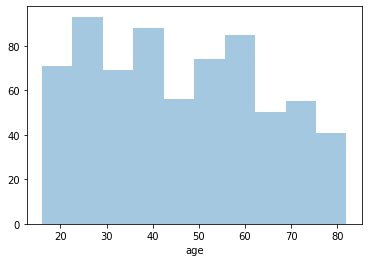

In [68]:
sns.distplot(a=df['age'], kde = False)

In [69]:
#The age can be grouped into chans as additional feature.
#The bins can be devided into real-life categories such as student or pensioner.
#Diveding into groups is in accordance to Canadian Statistic's Life Cycle.
#https://www.statcan.gc.ca/eng/concepts/definitions/age2

In [70]:
cut_labels_1 = ['1', '2', '3']
cut_bins1 = [15, 24, 64, 120]
df['Life-Cycle'] = pd.cut(df['age'], bins=cut_bins1, labels = cut_labels_1)
#1 - Youth (15-24 years)
#2 - Adults (25-64 years)
#3 - Seniors (65 years and over)

In [71]:
df['Life-Cycle'].unique()

[2, 3, 1]
Categories (3, object): [1 < 2 < 3]

In [72]:
#One more feature will be for grouping into generations according to the WEF article:
#https://www.weforum.org/agenda/2015/09/how-different-age-groups-identify-with-their-generational-labels/
#Grouped as per these data

In [73]:
cut_labels_1 = ['10', '20', '25', '30', '40']
cut_bins1 = [5, 25, 30, 40, 55, 120]
df['Generation'] = pd.cut(df['age'], bins=cut_bins1, labels = cut_labels_1)
#1 - Gen Z(5-25)
#2 - Gen Y.1(26-30)
#2.5 - Gen Y.2(31-40)
#3 - Gen X(41-55)
#4 - Baby Boomers(56-)
#As such assigned numbers cannot be integers, but only float, because of Gen Y is devided into two groups, these numbers are multipled by 10. 

In [74]:
#Regardless some people belonging to youth are not students, 
#anyway that mean that their working experience is not high that reflects on the salary.

In [76]:
#Setting for vizualization
#Disable Anaconda warnings
import warnings
warnings.simplefilter('ignore')

# will display the graphs directly in Jupyter
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#svg graphics look sharper
%config InlineBackend.figure_format = 'svg' 

#increase the default chart size for readability
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

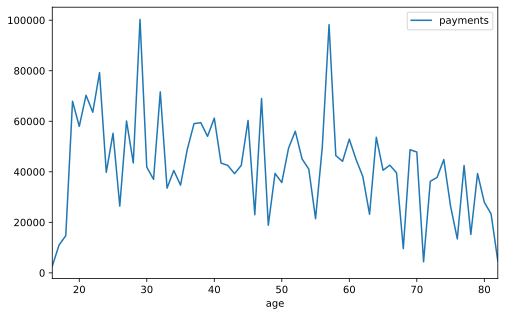

In [77]:
#One of the first thing that can be visualized is that who is willing to pay more for credits. 
sales_df = df[[x for x in df.columns if 'payment' in x] + ['age']]
sales_df.groupby('age').sum().plot()

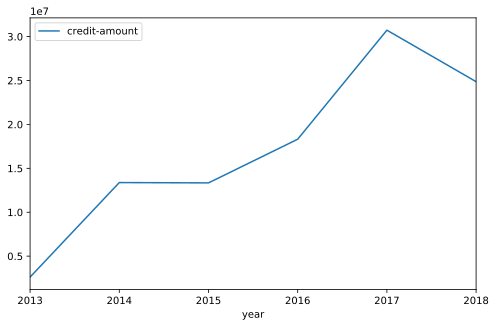

In [78]:
sales_df = df[[x for x in df.columns if 'credit-amount' in x] + ['year']]
sales_df.groupby('year').sum().plot()

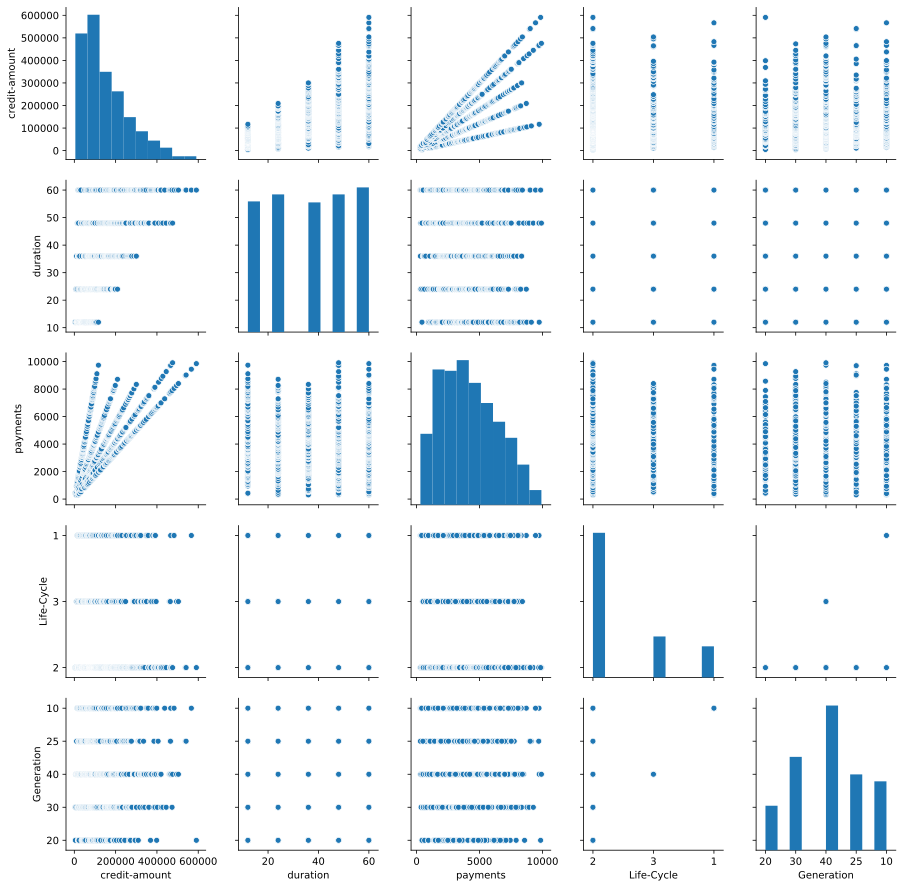

In [79]:
#This visualization will help us look at one picture of how the various features are related.
cols = ['credit-amount', 'duration', 'payments', 'status', 'fulldate', 'purpose', 'Life-Cycle', 'Generation']
sns_plot = sns.pairplot(df[cols])

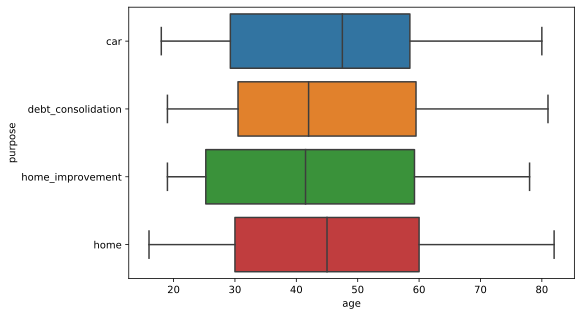

In [80]:
#Comparison of credits for the age group
top_platforms = df.payments.value_counts().sort_values(ascending = False).index.values
sns.boxplot(y="purpose", x="age", data=df[df.payments.isin(top_platforms)], orient="h")

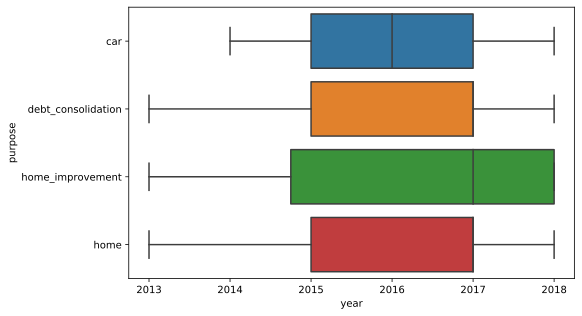

In [81]:
top_platforms = df.payments.value_counts().sort_values(ascending = False).index.values
sns.boxplot(y="purpose", x="year", data=df[df.payments.isin(top_platforms)], orient="h")

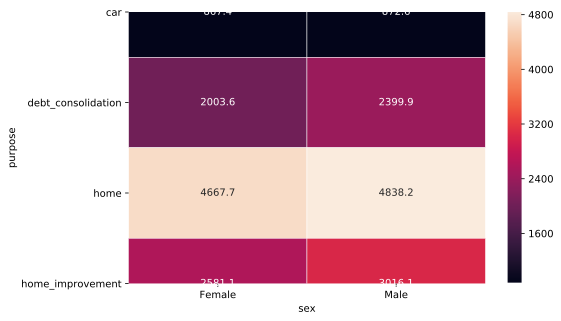

In [83]:
#Heat map for two categorical feaеtures. This allows you to look at the distribution of a 
#numerical attribute according to two categorical ones. We visualize the total payments for credits and generations
platform_genre_sales = df.pivot_table(
                        index='purpose', 
                        columns='sex', 
                        values='payments', 
                        aggfunc=np.mean).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

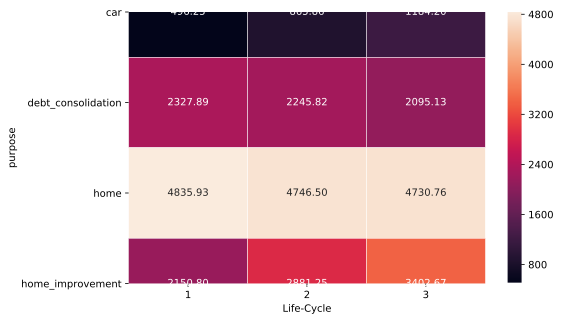

In [84]:
platform_genre_sales = df.pivot_table(
                        index='purpose', 
                        columns='Life-Cycle', 
                        values='payments', 
                        aggfunc=np.mean).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".2f", linewidths=.5)

In [85]:
#Youth are able to pay more for their home, however, the are considerably less take credits for home improvements in comparison to more adult people. 

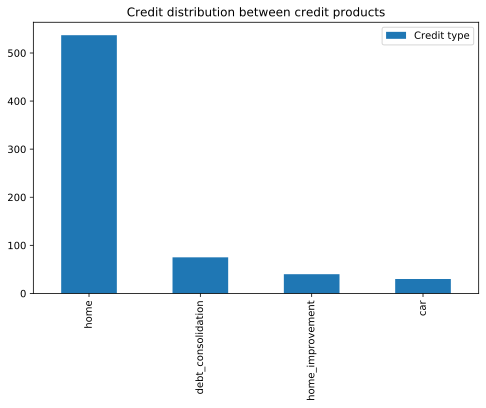

In [86]:
df['purpose'].value_counts().plot(kind='bar', label='Credit type')
plt.legend()
plt.title('Credit distribution between credit products');

In [90]:
#Look at the distribution of all the quantitative traits. 

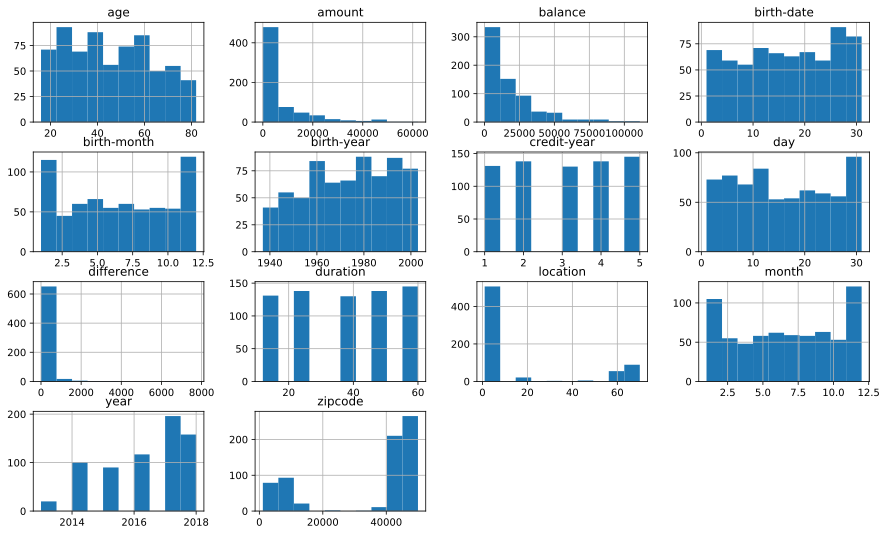

In [91]:
features = list(set(df.columns) - set(['credit-amount', 'payments', 'purpose',  'status',
                                      'sex']))

df[features].hist(figsize=(15,9));

In [92]:
#It is seen that most of the signs are distributed normally which are needed for the model.

In [100]:
from datetime import date

In [101]:
df['delta'] = df['fulldate'] - df['birthdate']

In [102]:
df['delta']

0      8605 days
1     19471 days
2     19530 days
3     14909 days
4     13832 days
         ...    
677   26351 days
678   11508 days
679   12762 days
680    6509 days
681    9873 days
Name: delta, Length: 682, dtype: timedelta64[ns]

In [103]:
### Feature Status

In [104]:
df['status'].value_counts()

C    403
A    203
D     45
B     31
Name: status, dtype: int64

In [105]:
#changing object into numberic categorical attribute
from sklearn.preprocessing import LabelEncoder

In [106]:
label_encoder = LabelEncoder()
for status in df:
    df['status'] = label_encoder.fit_transform(df['status'])

In [107]:
label_encoder = LabelEncoder()
for status in df:
    df['purpose'] = label_encoder.fit_transform(df['purpose'])

In [108]:
df = df.drop('fulldate', axis=1)

In [109]:
#Changing attribute type to more appropriate from float to integers 
df['credit-amount'] = df['credit-amount'].astype(int)
df['duration'] = df['duration'].astype(int)
df['payments'] = df['payments'].astype(int)
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)
df['location'] = df['location'].astype(int)
df['Life-Cycle'] = df['Life-Cycle'].astype(int)
df['Generation'] = df['Generation'].astype(int)
df['delta'] = df['delta'].astype(int)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, 0 to 681
Data columns (total 39 columns):
credit-amount    682 non-null int64
duration         682 non-null int64
payments         682 non-null int64
status           682 non-null int64
year             682 non-null int64
month            682 non-null int64
day              682 non-null int64
location         682 non-null int64
purpose          682 non-null int64
sex              682 non-null object
birthdate        682 non-null datetime64[ns]
birth-date       682 non-null float64
birth-month      682 non-null float64
birth-year       682 non-null float64
age              682 non-null float64
social           682 non-null object
first            682 non-null object
middle           682 non-null object
last             682 non-null object
phone            682 non-null object
email            682 non-null object
address_1        682 non-null object
city             682 non-null object
state            682 non-null object
zipcode  

# Additonal feature creation

In [111]:
df

,credit-amount,duration,payments,status,year,month,day,location,purpose,sex,birthdate,birth-date,birth-month,birth-year,age,social,first,middle,last,phone,email,address_1,city,state,zipcode,type,operation,amount,balance,To someone,bank,fulltime,bank_to,Request From,credit-year,difference,Life-Cycle,Generation,delta
0,4980,12,415,0,2014,7,5,59,0,Female,1990-12-13,13.0,12.0,1990.0,29.0,926-93-2157,Emma,Avaya,Smith,367-171-6840,gmail.com,387 Wellington Ave.,Albuquerque,NM,47246.0,Credit,Credit in Cash,700.0,700.0,NaN,NaN,11:02:40,YZ,Household Payment,1.0,1.000000,2,20,743472000000000000
1,5148,12,429,2,2018,5,28,1,0,Male,1965-02-04,4.0,2.0,1965.0,54.0,806-94-5725,Noah,Everest,Thompson,212-423-7734,gmail.com,75 W. Berkshire St.,New York City,NY,10040.0,Credit,Credit in Cash,900.0,900.0,NaN,NaN,08:23:33,ST,Loan Payment,1.0,1.000000,2,30,1682294400000000000
2,7656,24,319,0,2014,3,30,1,0,Female,1960-10-09,9.0,10.0,1960.0,59.0,614-70-9100,Olivia,Brooklynne,Johnson,212-425-6932,outlook.com,36 Second St.,New York City,NY,10162.0,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,15:19:21,QR,Household Payment,2.0,1.000000,2,40,1687392000000000000
3,8616,24,359,2,2017,9,26,1,0,Male,1976-12-01,1.0,12.0,1976.0,43.0,580-20-3414,Liam,Irvin,White,951-567-8925,gmail.com,7607 Sunnyslope Street,Indianapolis,IN,49047.0,Credit,Credit in Cash,600.0,600.0,NaN,NaN,10:42:35,WX,Household Payment,2.0,1.000000,2,30,1288137600000000000
4,10944,36,304,2,2018,5,17,1,0,Female,1980-07-03,3.0,7.0,1980.0,39.0,536-14-5809,Sophia,Danae,Williams,428-265-1568,gmail.com,755 Galvin Street,Indianapolis,IN,40852.0,Credit,Credit in Cash,400.0,400.0,NaN,NaN,11:39:25,CD,,3.0,1.000000,2,25,1195084800000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,504000,60,8400,2,2018,1,20,18,2,Male,1945-11-28,28.0,11.0,1945.0,74.0,423-50-5098,Allen,Camari,Cortez,424-700-9334,outlook.com,40 College Dr.,Minneapolis,MN,47667.0,Credit,Collection from Another Bank,3399.0,7411.1,NaN,Wells Fargo & Co.,10:59:12,GH,Insurance Payment,5.0,2.180377,3,40,2276726400000000000
678,538500,60,8975,2,2015,2,17,64,2,Female,1983-08-16,16.0,8.0,1983.0,36.0,704-97-5207,Haven,Lexi,Schwartz,508-056-6464,gmail.com,9650 Orchard St.,Worcester,MA,1603.0,Credit,Collection from Another Bank,5298.0,16336.9,Old Age Pension,Bank of New York Mellon Corp.,10:21:27,IJ,,5.0,3.083598,2,25,994291200000000000
679,541200,60,9020,3,2017,11,12,59,2,Male,1982-12-04,4.0,12.0,1982.0,37.0,558-20-4702,Atticus,Crue,Le,466-804-7095,gmail.com,638 N. 3rd Ave.,Houston,TX,44825.0,Credit,Collection from Another Bank,4042.0,4542.0,Old Age Pension,Bank of America,15:14:31,AB,Leasing Payment,5.0,1.123701,2,25,1102636800000000000
680,566640,60,9444,2,2018,1,23,1,2,Female,2000-03-29,29.0,3.0,2000.0,19.0,869-33-9702,Rowan,Katie,Steele,240-698-9725,outlook.com,68 Highland St.,Kansas City,MO,47471.0,Credit,Credit in Cash,14493.0,34324.3,NaN,NaN,13:44:49,EF,Household Payment,5.0,2.368336,1,10,562377600000000000


In [112]:
#Decreasing the size of number
df['duration-year'] = df['duration'] / 12
df['duration-year'].astype(int)

0      1
1      1
2      2
3      2
4      3
      ..
677    5
678    5
679    5
680    5
681    5
Name: duration-year, Length: 682, dtype: int64

In [113]:
#Transofrming continuous numeric feature

In [114]:
df['payments'] = df['payments'].astype(int)

In [115]:
df['payments-dif'] = df['payments'] / 100

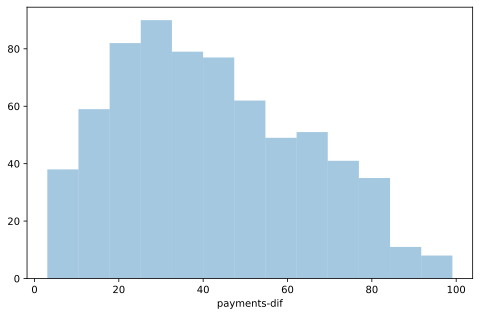

In [116]:
sns.distplot(a=df['payments-dif'], kde = False)

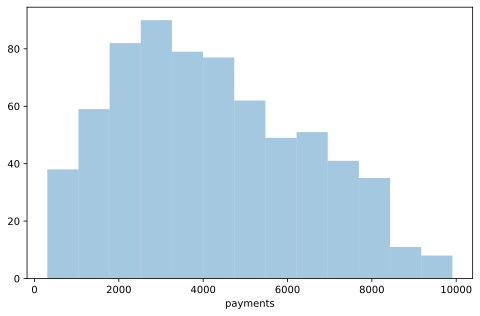

In [117]:
sns.distplot(a=df['payments'], kde = False)

In [118]:
#df['payments'].hist(range=100, figsize=(15,9));

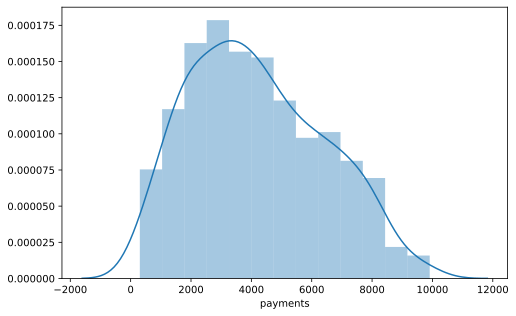

In [119]:
sns.distplot(df['payments'], hist=True)

In [120]:
df['payments'].value_counts(sort=True, ascending=True, normalize=True, bins=4)

(7508.5, 9910.0]                0.090909
(5107.0, 7508.5]                0.244868
(294.39300000000003, 2705.5]    0.291789
(2705.5, 5107.0]                0.372434
Name: payments, dtype: float64

The splitting of numerical features can be performed by sorting the features in the ascending order and trying each value as the threshold point and calculating the information gain for each value as the threshold. 

In [121]:
#As Tree-based models are not really influenced by scaling, the column of payments should be binned into part. 

In [122]:
df['payments'] = df['payments'].astype(int)

In [123]:
df['popularity_scale_10'] = np.array(
                   np.round((df['payments'] * 10)),  
                   dtype='int')
df['popularity_scale_100'] = np.array(
                  np.round((df['payments'] * 100)),    
                  dtype='int')

In [124]:
df

,credit-amount,duration,payments,status,year,month,day,location,purpose,sex,birthdate,birth-date,birth-month,birth-year,age,social,first,middle,last,phone,email,address_1,city,state,zipcode,type,operation,amount,balance,To someone,bank,fulltime,bank_to,Request From,credit-year,difference,Life-Cycle,Generation,delta,duration-year,payments-dif,popularity_scale_10,popularity_scale_100
0,4980,12,415,0,2014,7,5,59,0,Female,1990-12-13,13.0,12.0,1990.0,29.0,926-93-2157,Emma,Avaya,Smith,367-171-6840,gmail.com,387 Wellington Ave.,Albuquerque,NM,47246.0,Credit,Credit in Cash,700.0,700.0,NaN,NaN,11:02:40,YZ,Household Payment,1.0,1.000000,2,20,743472000000000000,1.0,4.15,4150,41500
1,5148,12,429,2,2018,5,28,1,0,Male,1965-02-04,4.0,2.0,1965.0,54.0,806-94-5725,Noah,Everest,Thompson,212-423-7734,gmail.com,75 W. Berkshire St.,New York City,NY,10040.0,Credit,Credit in Cash,900.0,900.0,NaN,NaN,08:23:33,ST,Loan Payment,1.0,1.000000,2,30,1682294400000000000,1.0,4.29,4290,42900
2,7656,24,319,0,2014,3,30,1,0,Female,1960-10-09,9.0,10.0,1960.0,59.0,614-70-9100,Olivia,Brooklynne,Johnson,212-425-6932,outlook.com,36 Second St.,New York City,NY,10162.0,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,15:19:21,QR,Household Payment,2.0,1.000000,2,40,1687392000000000000,2.0,3.19,3190,31900
3,8616,24,359,2,2017,9,26,1,0,Male,1976-12-01,1.0,12.0,1976.0,43.0,580-20-3414,Liam,Irvin,White,951-567-8925,gmail.com,7607 Sunnyslope Street,Indianapolis,IN,49047.0,Credit,Credit in Cash,600.0,600.0,NaN,NaN,10:42:35,WX,Household Payment,2.0,1.000000,2,30,1288137600000000000,2.0,3.59,3590,35900
4,10944,36,304,2,2018,5,17,1,0,Female,1980-07-03,3.0,7.0,1980.0,39.0,536-14-5809,Sophia,Danae,Williams,428-265-1568,gmail.com,755 Galvin Street,Indianapolis,IN,40852.0,Credit,Credit in Cash,400.0,400.0,NaN,NaN,11:39:25,CD,,3.0,1.000000,2,25,1195084800000000000,3.0,3.04,3040,30400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,504000,60,8400,2,2018,1,20,18,2,Male,1945-11-28,28.0,11.0,1945.0,74.0,423-50-5098,Allen,Camari,Cortez,424-700-9334,outlook.com,40 College Dr.,Minneapolis,MN,47667.0,Credit,Collection from Another Bank,3399.0,7411.1,NaN,Wells Fargo & Co.,10:59:12,GH,Insurance Payment,5.0,2.180377,3,40,2276726400000000000,5.0,84.00,84000,840000
678,538500,60,8975,2,2015,2,17,64,2,Female,1983-08-16,16.0,8.0,1983.0,36.0,704-97-5207,Haven,Lexi,Schwartz,508-056-6464,gmail.com,9650 Orchard St.,Worcester,MA,1603.0,Credit,Collection from Another Bank,5298.0,16336.9,Old Age Pension,Bank of New York Mellon Corp.,10:21:27,IJ,,5.0,3.083598,2,25,994291200000000000,5.0,89.75,89750,897500
679,541200,60,9020,3,2017,11,12,59,2,Male,1982-12-04,4.0,12.0,1982.0,37.0,558-20-4702,Atticus,Crue,Le,466-804-7095,gmail.com,638 N. 3rd Ave.,Houston,TX,44825.0,Credit,Collection from Another Bank,4042.0,4542.0,Old Age Pension,Bank of America,15:14:31,AB,Leasing Payment,5.0,1.123701,2,25,1102636800000000000,5.0,90.20,90200,902000
680,566640,60,9444,2,2018,1,23,1,2,Female,2000-03-29,29.0,3.0,2000.0,19.0,869-33-9702,Rowan,Katie,Steele,240-698-9725,outlook.com,68 Highland St.,Kansas City,MO,47471.0,Credit,Credit in Cash,14493.0,34324.3,NaN,NaN,13:44:49,EF,Household Payment,5.0,2.368336,1,10,562377600000000000,5.0,94.44,94440,944400


The clear strategy for dividing payments into bins were not found out. Therefore, one of the options is to separete per equil quantiles. In order to not make it highly correlated with 'credit-amount' groups, the deviding is into four groups, not for to. If two attributes will be highly correclated, there is high-chance for overfitting. 

In [125]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['payments'].quantile(quantile_list)
quantiles

0.00     304.0
0.25    2477.0
0.50    3934.0
0.75    5813.5
1.00    9910.0
Name: payments, dtype: float64

In [126]:
quantile_labels = ['25', '50', '75', '100']
df['Income_quantile_range'] = pd.qcut(
                                            df['payments'], 
                                            q=quantile_list)
df['Income_quantile_label'] = pd.qcut(
                                            df['payments'], 
                                            q=quantile_list,       
                                            labels=quantile_labels)

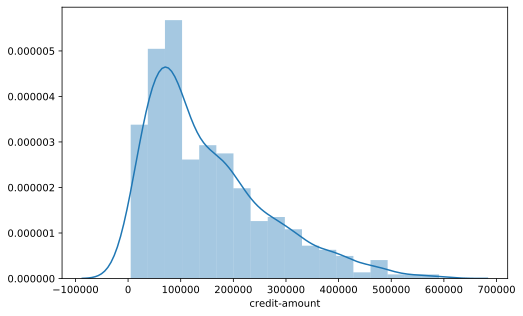

In [128]:
sns.distplot(df['credit-amount'], hist=True)

Distribution is skewed to the left side. As the major amount of credits is allocated to 100.000 USD, the continous numberic attribate can be devided into two groups. 

In [129]:
cut_labels_1 = ['1', '2']
cut_bins1 = [0, 100000, 700000]
df['credit-amount-gr'] = pd.cut(df['credit-amount'], bins=cut_bins1, labels = cut_labels_1)

In [130]:
df['credit-amount-gr'] = df['credit-amount-gr'].astype(int)

In [131]:
df

,credit-amount,duration,payments,status,year,month,day,location,purpose,sex,birthdate,birth-date,birth-month,birth-year,age,social,first,middle,last,phone,email,address_1,city,state,zipcode,type,operation,amount,balance,To someone,bank,fulltime,bank_to,Request From,credit-year,difference,Life-Cycle,Generation,delta,duration-year,payments-dif,popularity_scale_10,popularity_scale_100,Income_quantile_range,Income_quantile_label,credit-amount-gr
0,4980,12,415,0,2014,7,5,59,0,Female,1990-12-13,13.0,12.0,1990.0,29.0,926-93-2157,Emma,Avaya,Smith,367-171-6840,gmail.com,387 Wellington Ave.,Albuquerque,NM,47246.0,Credit,Credit in Cash,700.0,700.0,NaN,NaN,11:02:40,YZ,Household Payment,1.0,1.000000,2,20,743472000000000000,1.0,4.15,4150,41500,"(303.999, 2477.0]",25,1
1,5148,12,429,2,2018,5,28,1,0,Male,1965-02-04,4.0,2.0,1965.0,54.0,806-94-5725,Noah,Everest,Thompson,212-423-7734,gmail.com,75 W. Berkshire St.,New York City,NY,10040.0,Credit,Credit in Cash,900.0,900.0,NaN,NaN,08:23:33,ST,Loan Payment,1.0,1.000000,2,30,1682294400000000000,1.0,4.29,4290,42900,"(303.999, 2477.0]",25,1
2,7656,24,319,0,2014,3,30,1,0,Female,1960-10-09,9.0,10.0,1960.0,59.0,614-70-9100,Olivia,Brooklynne,Johnson,212-425-6932,outlook.com,36 Second St.,New York City,NY,10162.0,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,15:19:21,QR,Household Payment,2.0,1.000000,2,40,1687392000000000000,2.0,3.19,3190,31900,"(303.999, 2477.0]",25,1
3,8616,24,359,2,2017,9,26,1,0,Male,1976-12-01,1.0,12.0,1976.0,43.0,580-20-3414,Liam,Irvin,White,951-567-8925,gmail.com,7607 Sunnyslope Street,Indianapolis,IN,49047.0,Credit,Credit in Cash,600.0,600.0,NaN,NaN,10:42:35,WX,Household Payment,2.0,1.000000,2,30,1288137600000000000,2.0,3.59,3590,35900,"(303.999, 2477.0]",25,1
4,10944,36,304,2,2018,5,17,1,0,Female,1980-07-03,3.0,7.0,1980.0,39.0,536-14-5809,Sophia,Danae,Williams,428-265-1568,gmail.com,755 Galvin Street,Indianapolis,IN,40852.0,Credit,Credit in Cash,400.0,400.0,NaN,NaN,11:39:25,CD,,3.0,1.000000,2,25,1195084800000000000,3.0,3.04,3040,30400,"(303.999, 2477.0]",25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,504000,60,8400,2,2018,1,20,18,2,Male,1945-11-28,28.0,11.0,1945.0,74.0,423-50-5098,Allen,Camari,Cortez,424-700-9334,outlook.com,40 College Dr.,Minneapolis,MN,47667.0,Credit,Collection from Another Bank,3399.0,7411.1,NaN,Wells Fargo & Co.,10:59:12,GH,Insurance Payment,5.0,2.180377,3,40,2276726400000000000,5.0,84.00,84000,840000,"(5813.5, 9910.0]",100,2
678,538500,60,8975,2,2015,2,17,64,2,Female,1983-08-16,16.0,8.0,1983.0,36.0,704-97-5207,Haven,Lexi,Schwartz,508-056-6464,gmail.com,9650 Orchard St.,Worcester,MA,1603.0,Credit,Collection from Another Bank,5298.0,16336.9,Old Age Pension,Bank of New York Mellon Corp.,10:21:27,IJ,,5.0,3.083598,2,25,994291200000000000,5.0,89.75,89750,897500,"(5813.5, 9910.0]",100,2
679,541200,60,9020,3,2017,11,12,59,2,Male,1982-12-04,4.0,12.0,1982.0,37.0,558-20-4702,Atticus,Crue,Le,466-804-7095,gmail.com,638 N. 3rd Ave.,Houston,TX,44825.0,Credit,Collection from Another Bank,4042.0,4542.0,Old Age Pension,Bank of America,15:14:31,AB,Leasing Payment,5.0,1.123701,2,25,1102636800000000000,5.0,90.20,90200,902000,"(5813.5, 9910.0]",100,2
680,566640,60,9444,2,2018,1,23,1,2,Female,2000-03-29,29.0,3.0,2000.0,19.0,869-33-9702,Rowan,Katie,Steele,240-698-9725,outlook.com,68 Highland St.,Kansas City,MO,47471.0,Credit,Credit in Cash,14493.0,34324.3,NaN,NaN,13:44:49,EF,Household Payment,5.0,2.368336,1,10,562377600000000000,5.0,94.44,94440,944400,"(5813.5, 9910.0]",100,2


In [132]:
#Gender transformation
#One of the options is to transofrm Gender column with hot encoding as the are no lots of values. 

In [133]:
onehot_gender = pd.get_dummies(df['sex'])

In [134]:
df = df.join(onehot_gender)

In [135]:
df

,credit-amount,duration,payments,status,year,month,day,location,purpose,sex,birthdate,birth-date,birth-month,birth-year,age,social,first,middle,last,phone,email,address_1,city,state,zipcode,type,operation,amount,balance,To someone,bank,fulltime,bank_to,Request From,credit-year,difference,Life-Cycle,Generation,delta,duration-year,payments-dif,popularity_scale_10,popularity_scale_100,Income_quantile_range,Income_quantile_label,credit-amount-gr,Female,Male
0,4980,12,415,0,2014,7,5,59,0,Female,1990-12-13,13.0,12.0,1990.0,29.0,926-93-2157,Emma,Avaya,Smith,367-171-6840,gmail.com,387 Wellington Ave.,Albuquerque,NM,47246.0,Credit,Credit in Cash,700.0,700.0,NaN,NaN,11:02:40,YZ,Household Payment,1.0,1.000000,2,20,743472000000000000,1.0,4.15,4150,41500,"(303.999, 2477.0]",25,1,1,0
1,5148,12,429,2,2018,5,28,1,0,Male,1965-02-04,4.0,2.0,1965.0,54.0,806-94-5725,Noah,Everest,Thompson,212-423-7734,gmail.com,75 W. Berkshire St.,New York City,NY,10040.0,Credit,Credit in Cash,900.0,900.0,NaN,NaN,08:23:33,ST,Loan Payment,1.0,1.000000,2,30,1682294400000000000,1.0,4.29,4290,42900,"(303.999, 2477.0]",25,1,0,1
2,7656,24,319,0,2014,3,30,1,0,Female,1960-10-09,9.0,10.0,1960.0,59.0,614-70-9100,Olivia,Brooklynne,Johnson,212-425-6932,outlook.com,36 Second St.,New York City,NY,10162.0,Credit,Credit in Cash,1000.0,1000.0,NaN,NaN,15:19:21,QR,Household Payment,2.0,1.000000,2,40,1687392000000000000,2.0,3.19,3190,31900,"(303.999, 2477.0]",25,1,1,0
3,8616,24,359,2,2017,9,26,1,0,Male,1976-12-01,1.0,12.0,1976.0,43.0,580-20-3414,Liam,Irvin,White,951-567-8925,gmail.com,7607 Sunnyslope Street,Indianapolis,IN,49047.0,Credit,Credit in Cash,600.0,600.0,NaN,NaN,10:42:35,WX,Household Payment,2.0,1.000000,2,30,1288137600000000000,2.0,3.59,3590,35900,"(303.999, 2477.0]",25,1,0,1
4,10944,36,304,2,2018,5,17,1,0,Female,1980-07-03,3.0,7.0,1980.0,39.0,536-14-5809,Sophia,Danae,Williams,428-265-1568,gmail.com,755 Galvin Street,Indianapolis,IN,40852.0,Credit,Credit in Cash,400.0,400.0,NaN,NaN,11:39:25,CD,,3.0,1.000000,2,25,1195084800000000000,3.0,3.04,3040,30400,"(303.999, 2477.0]",25,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,504000,60,8400,2,2018,1,20,18,2,Male,1945-11-28,28.0,11.0,1945.0,74.0,423-50-5098,Allen,Camari,Cortez,424-700-9334,outlook.com,40 College Dr.,Minneapolis,MN,47667.0,Credit,Collection from Another Bank,3399.0,7411.1,NaN,Wells Fargo & Co.,10:59:12,GH,Insurance Payment,5.0,2.180377,3,40,2276726400000000000,5.0,84.00,84000,840000,"(5813.5, 9910.0]",100,2,0,1
678,538500,60,8975,2,2015,2,17,64,2,Female,1983-08-16,16.0,8.0,1983.0,36.0,704-97-5207,Haven,Lexi,Schwartz,508-056-6464,gmail.com,9650 Orchard St.,Worcester,MA,1603.0,Credit,Collection from Another Bank,5298.0,16336.9,Old Age Pension,Bank of New York Mellon Corp.,10:21:27,IJ,,5.0,3.083598,2,25,994291200000000000,5.0,89.75,89750,897500,"(5813.5, 9910.0]",100,2,1,0
679,541200,60,9020,3,2017,11,12,59,2,Male,1982-12-04,4.0,12.0,1982.0,37.0,558-20-4702,Atticus,Crue,Le,466-804-7095,gmail.com,638 N. 3rd Ave.,Houston,TX,44825.0,Credit,Collection from Another Bank,4042.0,4542.0,Old Age Pension,Bank of America,15:14:31,AB,Leasing Payment,5.0,1.123701,2,25,1102636800000000000,5.0,90.20,90200,902000,"(5813.5, 9910.0]",100,2,0,1
680,566640,60,9444,2,2018,1,23,1,2,Female,2000-03-29,29.0,3.0,2000.0,19.0,869-33-9702,Rowan,Katie,Steele,240-698-9725,outlook.com,68 Highland St.,Kansas City,MO,47471.0,Credit,Credit in Cash,14493.0,34324.3,NaN,NaN,13:44:49,EF,Household Payment,5.0,2.368336,1,10,562377600000000000,5.0,94.44,94440,944400,"(5813.5, 9910.0]",100,2,1,0


In [136]:
#'Email' column convertation

The first option is just encode with labels.

In [137]:
from sklearn.preprocessing import LabelEncoder

In [138]:
#instance creation
label_encoder = LabelEncoder()
#tranformation and storing data into 'email types' column. 
df['email_types'] = label_encoder.fit_transform(df['email'])

The second attempt is to create a frequence encoding for email attribute, then check the feature importance and remove these that influence on the model worse. For simlicity, treating email types as numeric variable, all parts are unique type values,hence, these values will be replaced with average of emails that are grouped by our targer variables. 
Refference: https://www.kaggle.com/dustinthewind/making-sense-of-mean-encoding

In [139]:
encod_type = df.groupby('purpose')['email_types'].mean()
print(encod_type)
df.loc[:, 'type_mean_email'] = df['purpose'].map(encod_type)
df[['purpose','type_mean_email']].head(100)

purpose
0    0.266667
1    0.346667
2    0.774674
3    0.175000
Name: email_types, dtype: float64


,purpose,type_mean_email
0,0,0.266667
1,0,0.266667
2,0,0.266667
3,0,0.266667
4,0,0.266667
...,...,...
95,1,0.346667
96,1,0.346667
97,1,0.346667
98,3,0.175000


In [140]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [141]:
most_frequent_values(df)

,credit-amount,duration,payments,status,year,month,day,location,purpose,sex,birthdate,birth-date,birth-month,birth-year,age,social,first,middle,last,phone,email,address_1,city,state,zipcode,type,operation,amount,balance,To someone,bank,fulltime,bank_to,Request From,credit-year,difference,Life-Cycle,Generation,delta,duration-year,payments-dif,popularity_scale_10,popularity_scale_100,Income_quantile_range,Income_quantile_label,credit-amount-gr,Female,Male,email_types,type_mean_email
Total,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,541,682,682,200,99,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682
Most frequent item,30276,60,3151,2,2017,12,11,1,2,Male,1981-11-28 00:00:00,27,12,1962,57,465-94-8869,Riley,Olivia,Butler,735-784-3483,gmail.com,191 Wall Lane,New York City,NY,1853,Credit,Credit in Cash,200,200,Interest Credited,Bank of New York Mellon Corp.,08:48:50,KL,Household Payment,5,1,2,40,1740873600000000000,5,25.23,25230,252300,"(303.999, 2477.0]",25,2,0,1,0,0.774674
Frequence,4,145,4,403,196,66,34,507,537,351,2,40,70,22,22,1,2,2,2,1,434,1,84,114,5,640,404,27,26,141,14,2,62,392,145,208,455,231,2,145,4,4,4,172,172,377,351,351,434,537
Percent from total,0.587,21.261,0.587,59.091,28.739,9.677,4.985,74.34,78.739,51.466,0.293,5.865,10.264,3.226,3.226,0.147,0.293,0.293,0.293,0.147,63.636,0.147,12.317,16.716,0.733,93.842,74.677,3.959,3.812,70.5,14.141,0.293,9.091,57.478,21.261,30.499,66.716,33.871,0.293,21.261,0.587,0.587,0.587,25.22,25.22,55.279,51.466,51.466,63.636,78.739


In [142]:
#Unique values checking
for column in df.columns.values:
    print(f"[train_labels] Unique values of {column} : {df[column].nunique()}")

[train_labels] Unique values of credit-amount : 645
[train_labels] Unique values of duration : 5
[train_labels] Unique values of payments : 577
[train_labels] Unique values of status : 4
[train_labels] Unique values of year : 6
[train_labels] Unique values of month : 12
[train_labels] Unique values of day : 31
[train_labels] Unique values of location : 8
[train_labels] Unique values of purpose : 4
[train_labels] Unique values of sex : 2
[train_labels] Unique values of birthdate : 674
[train_labels] Unique values of birth-date : 31
[train_labels] Unique values of birth-month : 12
[train_labels] Unique values of birth-year : 67
[train_labels] Unique values of age : 67
[train_labels] Unique values of social : 682
[train_labels] Unique values of first : 669
[train_labels] Unique values of middle : 677
[train_labels] Unique values of last : 369
[train_labels] Unique values of phone : 682
[train_labels] Unique values of email : 4
[train_labels] Unique values of address_1 : 682
[train_labels]

# Model

In [143]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [144]:
#from sklearn.model_selection import train_test_split
#Features
#X = df.drop('purpose', axis=1)
#Target
#y = df['purpose']
#Spliting for train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

Dataset is split 80%/20% as training/testing data
Multi - Classification model
ROC/AUC is used to evaluate predictionsModels used
-DecisionTreeClassifier
-RandomForestClassifier
-XGBoostClassifier

In [150]:
from sklearn.model_selection import train_test_split
X = df[['credit-amount', 'duration', 'payments', 'status', 'year', 'month', 'day', 'location', 
        'credit-year', 'Life-Cycle', 'Generation', 'delta', 'duration-year', 'payments-dif', 'popularity_scale_10', 
        'credit-amount-gr', 'Female', 'Male', 'email_types', 'type_mean_email']]
Y = df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [154]:
from sklearn import metrics

decision_tree = RandomForestClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict_proba(X_test)

print('Logarithmic Loss:', metrics.log_loss(y_test, y_pred))

Logarithmic Loss: 0.3296976261378305


In [155]:
#Model improvement

In [157]:
classifier = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='log2',
    max_depth=10,
    bootstrap=True
)
classifier.fit(X_train, y_train)
classifier.predict_proba(X_test)

print('Logarithmic Loss:', metrics.log_loss(y_test, classifier.predict_proba(X_test)))

Logarithmic Loss: 0.14730141522941959


In [158]:
#Feature importance

In [159]:
feature_imp = pd.Series(decision_tree.feature_importances_,index=list(X)).sort_values(ascending=False)

No handles with labels found to put in legend.


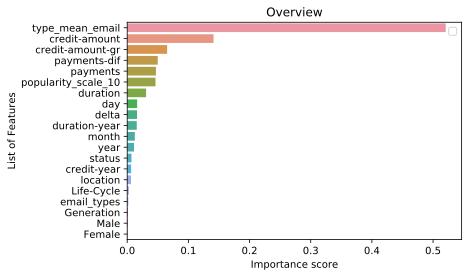

In [160]:
x = sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Importance score')
plt.ylabel('List of Features')
plt.title("Overview")
plt.legend()
plt.show()

In [161]:
pd.DataFrame(decision_tree.feature_importances_,
             index=X_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
type_mean_email,0.520676
credit-amount,0.141092
credit-amount-gr,0.065254
payments-dif,0.049896
payments,0.046966
popularity_scale_10,0.046244
duration,0.030831
day,0.016268
delta,0.016114
duration-year,0.015643


## XGBoost

In [162]:
import os
import gc
import pickle
import time
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import xgboost as xgb
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [163]:
from sklearn.model_selection import train_test_split
X = df[['credit-amount', 'duration', 'payments', 'status', 'year', 'month', 'day', 'location', 
        'credit-year', 'Life-Cycle', 'Generation', 'delta', 'duration-year', 'payments-dif', 'popularity_scale_10', 
        'credit-amount-gr', 'Female', 'Male', 'email_types', 'type_mean_email']]
Y = df.iloc[:, 8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [164]:
ts = time.time()

xgbmodel = XGBClassifier(
    max_depth=10,
    n_estimators=100,
    min_child_weight=0.5, 
    colsample_bytree=0.4, 
    subsample=0.4, 
    eta=0.1,
    seed=30)

xgbmodel.fit(
    X_train, 
    Y_train, 
    eval_metric='mlogloss',
    verbose=True)

time.time() - ts

0.21213221549987793

In [166]:
print('Logarithmic Loss:', metrics.log_loss(y_test, xgbmodel.predict_proba(X_test)))

Logarithmic Loss: 0.03047166443064496


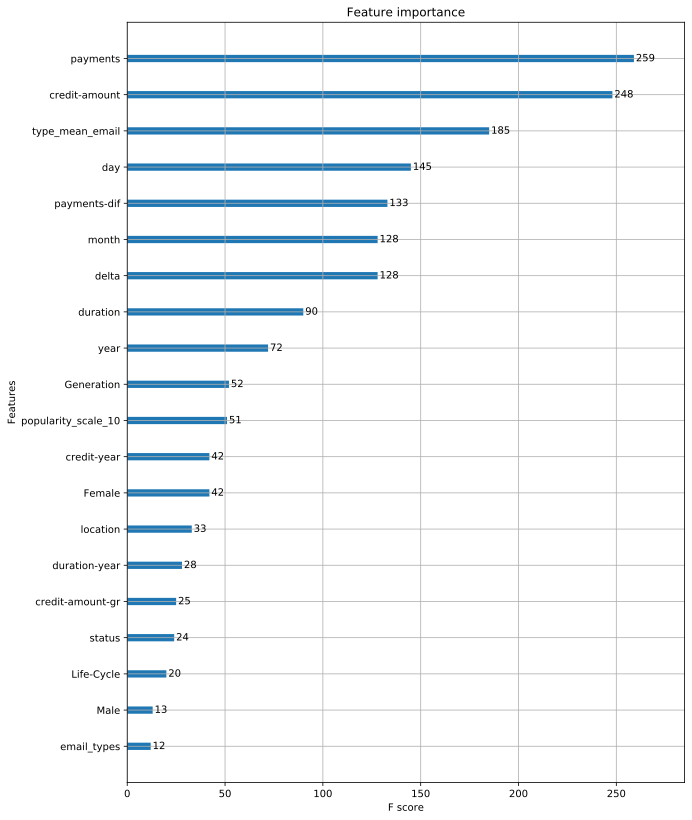

In [167]:
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(xgbmodel, (10,14))

In [170]:
from bayes_opt import BayesianOptimization

In [171]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test)

In [176]:
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': int(gamma),
              'colsample_bytree': int(colsample_bytree)}
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [177]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=3, n_iter=5, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        | -0.3242   |  0.457    |  0.6112   |  6.338    |
|  2        | -0.3034   |  0.6934   |  0.08767  |  4.07     |
|  3        | -0.3149   |  0.5362   |  0.309    |  5.382    |
|  4        | -0.2933   |  0.9      |  0.0      |  3.0      |
|  5        | -0.2933   |  0.3415   |  0.9722   |  3.019    |
|  6        | -0.2933   |  0.8925   |  0.9499   |  3.013    |
|  7        | -0.2933   |  0.329    |  0.2337   |  3.002    |
|  8        | -0.2933   |  0.3961   |  0.9653   |  3.007    |


In [178]:
#To see the results
xgb_bo.max

{'target': -0.2932806666666667,
 'params': {'colsample_bytree': 0.9, 'gamma': 0.0, 'max_depth': 3.0}}

In [179]:
#To see the first parametrs
xgb_bo.res[0]

{'target': -0.32416333333333336,
 'params': {'colsample_bytree': 0.45702737644968117,
  'gamma': 0.6112345654468574,
  'max_depth': 6.338124311774354}}

## LGBM Model

In [180]:
from lightgbm import LGBMClassifier

In [181]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, log_loss, multilabel_confusion_matrix, f1_score, average_precision_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

In [182]:
lgb_clf = LGBMClassifier(random_state=17)

In [183]:
lgb_clf.fit(X_train, Y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=17, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [184]:
log_loss(Y_test, lgb_clf.predict_proba(X_test))

2.123600495295008e-05

In [185]:
#Tuning

In [186]:
param_grid = {'num_leaves': [7, 15, 35, 70], 
              'max_depth': [10, 20, 30, 40, -1]}

In [187]:
grid_searcher = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, 
                             cv=5, verbose=1, n_jobs=4)

In [188]:
grid_searcher.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    8.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=17, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=4,
             param_grid={'max_depth': [10, 20, 30, 40, -1],
                         'num

In [189]:
grid_searcher.best_params_, grid_searcher.best_score_

({'max_depth': 10, 'num_leaves': 7}, 1.0)

In [190]:
y_pred_lgbm = grid_searcher.predict_proba(X_test)
log_loss(Y_test, y_pred_lgbm)

2.1236004956028753e-05

In [191]:
accuracy_score(Y_test, grid_searcher.predict(X_test))

1.0

In [192]:
#Stage 2

In [193]:
num_iterations = 300
lgb_clf2 = LGBMClassifier(random_state=17, max_depth=-1, 
                          num_leaves=63, n_estimators=num_iterations,
                          n_jobs=1)

param_grid2 = {'learning_rate': np.logspace(-3, 0, 10)}
grid_searcher2 = GridSearchCV(estimator=lgb_clf2, param_grid=param_grid2,
                               cv=5, verbose=1, n_jobs=4)
grid_searcher2.fit(X_train, y_train)
print(grid_searcher2.best_params_, grid_searcher2.best_score_)
print(accuracy_score(y_test, grid_searcher2.predict(X_test)))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    5.6s finished
/Users/amihailovs/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.046415888336127774} 1.0
1.0


In [194]:
final_lgb = LGBMClassifier(n_estimators=200, num_leaves=63,
                           learning_rate=0.2, max_depth=-1,
                         n_jobs=4)

In [195]:
final_lgb.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=200, n_jobs=4, num_leaves=63, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [196]:
#For esnsembling
pred_test_xgb = final_lgb.fit(X_train, y_train)

In [197]:
%%time
log_loss(Y_test, final_lgb.predict_proba(X_test))

CPU times: user 13.8 ms, sys: 1.48 ms, total: 15.2 ms
Wall time: 10.8 ms


5.852032624048664e-06

In [199]:
pd.DataFrame(final_lgb.feature_importances_,
             index=X_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
credit-amount,672
payments,492
type_mean_email,466
delta,80
day,75
year,25
status,10
month,7
duration,3
Female,3


# CatBoost###

In [ ]:
from catboost import CatBoostRegressor, CatBoostClassifier

In [ ]:
cb_model = CatBoostClassifier(iterations=100,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='MultiClass',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)

In [ ]:
cb_model.fit(X_train, y_train,
             eval_set=(X_test, y_test),
             use_best_model=True,
             verbose=50)

In [ ]:
pred_test_cat = cb_model.predict_proba(X_test)

In [ ]:
log_loss(Y_test, pred_test_cat)

In [ ]:
#Hyperparameter optimization for catboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

In [225]:
params={
    'random_seed' : [10, 15, 20, 30, 40, 50, 60],
    'bagging_temperature' : [0.1, 0.2, 0.3, 0.5, 0.7, 0.9],
    'metric_period' : [20, 30, 40, 50, 70, 90],
    'od_wait' : [5, 10, 20, 25, 30, 40]
}

kf = KFold(n_splits=5)

In [226]:
catboost = CatBoostClassifier()

In [227]:
random=RandomizedSearchCV(catboost,param_distributions=params,n_iter=5,scoring='f1_micro',n_jobs=-1,cv=kf,verbose=3)

In [228]:
random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.0min finished


Learning rate set to 0.076715
0:	learn: 1.2012634	total: 3.31ms	remaining: 3.31s
70:	learn: 0.0276225	total: 176ms	remaining: 2.31s
140:	learn: 0.0073323	total: 478ms	remaining: 2.91s
210:	learn: 0.0041016	total: 672ms	remaining: 2.51s
280:	learn: 0.0028014	total: 910ms	remaining: 2.33s
350:	learn: 0.0021286	total: 1.08s	remaining: 2s
420:	learn: 0.0017181	total: 1.33s	remaining: 1.83s
490:	learn: 0.0014428	total: 1.5s	remaining: 1.55s
560:	learn: 0.0012462	total: 1.74s	remaining: 1.36s
630:	learn: 0.0010975	total: 1.91s	remaining: 1.12s
700:	learn: 0.0009810	total: 2.2s	remaining: 938ms
770:	learn: 0.0008877	total: 2.37s	remaining: 705ms
840:	learn: 0.0008108	total: 2.62s	remaining: 494ms
910:	learn: 0.0007465	total: 2.79s	remaining: 272ms
980:	learn: 0.0006916	total: 3.03s	remaining: 58.7ms
999:	learn: 0.0006784	total: 3.08s	remaining: 0us


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=<catboost.core.CatBoostClassifier object at 0x11dca1910>,
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0.1, 0.2, 0.3,
                                                                0.5, 0.7, 0.9],
                                        'metric_period': [20, 30, 40, 50, 70,
                                                          90],
                                        'od_wait': [5, 10, 20, 25, 30, 40],
                                        'random_seed': [10, 15, 20, 30, 40, 50,
                                                        60]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1_micro', verbose=3)

In [230]:
random.best_estimator_

In [231]:
random.best_params_

{'random_seed': 50,
 'od_wait': 25,
 'metric_period': 70,
 'bagging_temperature': 0.7}

In [234]:
y_pred_cat = random.predict_proba(X_test)
log_loss(Y_test, y_pred_cat)

0.0016901591205591645

In [241]:
f_importance = pd.Series(cb_model.feature_importances_,index=list(X)).sort_values(ascending=False)

No handles with labels found to put in legend.


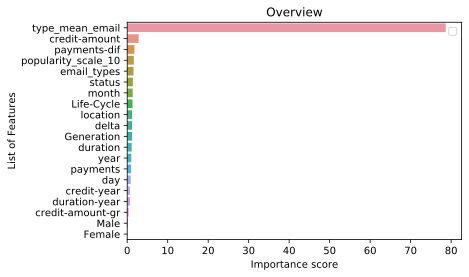

In [242]:
x = sns.barplot(x=f_importance, y=f_importance.index)
plt.xlabel('Importance score')
plt.ylabel('List of Features')
plt.title("Overview")
plt.legend()
plt.show()

In [243]:
pd.DataFrame(cb_model.feature_importances_,
             index=X_train.columns, columns=['Importance']).sort_values(
    by='Importance', ascending=False)[:10]

,Importance
type_mean_email,78.655946
credit-amount,2.825752
payments-dif,1.772465
popularity_scale_10,1.637357
email_types,1.551824
status,1.405007
month,1.363033
Life-Cycle,1.317252
location,1.218852
delta,1.212642


In [ ]:
---

In [ ]:
###

In [ ]:
#Feature evaluation

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
---

In [ ]:
###

In [ ]:
sub_lgb = pd.DataFrame()
sub_lgb["target"] = pred_test

sub_xgb = pd.DataFrame()
sub_xgb["target"] = pred_test_xgb

sub_cat = pd.DataFrame()
sub_cat["target"] = pred_test_cat

sub["target"] = (sub_lgb["target"] * 0.5 + sub_xgb["target"] * 0.3 + sub_cat["target"] * 0.2)

In [ ]:
###Ensembling

In [ ]:
sub_xgb = pd.DataFrame()

In [ ]:
sub_xgb["target"] = pred_test_xgb

In [ ]:
sub_cat = pd.DataFrame()

In [ ]:
sub_cat["target"] = pred_test_cat

In [ ]:
sub["target"] = (sub_xgb["target"] * 0.3 + sub_cat["target"] * 0.7)

In [ ]:
---

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()